In [1]:
import os

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

os.chdir('/content/gdrive/MyDrive/Utah_Coursework/COMP5960_Project_2023')

print('Current Working Directory:', os.getcwd())

Mounted at /content/gdrive
Current Working Directory: /content/gdrive/MyDrive/Utah_Coursework/COMP5960_Project_2023


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This next line tells jupyter to render the images inline
%matplotlib inline
import matplotlib_inline
# This renders your figures as vector graphics AND gives you an option to download a PDF too
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'pdf')

In [ ]:
trax_df = pd.read_csv('./data/TRX01_2018_11.csv')

headers = trax_df.columns.to_list()
units = trax_df.iloc[0].to_list()

new_headers = [f'{h}_{u}' for h, u in zip(headers, units)]

trax_df = trax_df.iloc[1:].reset_index(drop=True)
trax_df.columns = new_headers

trax_df['Timestamp_UTC'] = pd.to_datetime(trax_df['Timestamp_UTC'])

for col in range(1, 18):
  trax_df.iloc[:, col] = trax_df.iloc[:, col].astype(float)

trax_df['PM2.5_Data_Flagged_binary'] = trax_df['PM2.5_Data_Flagged_binary'].astype(bool)
trax_df['Ozone_Data_Flagged_binary'] = trax_df['Ozone_Data_Flagged_binary'].astype(bool)

trax_df['Time_Tuple'] = trax_df['Timestamp_UTC'].apply(lambda x: x.timetuple())
trax_df['Date'] = trax_df['Timestamp_UTC'].apply(lambda x: x.date())
trax_df['Year'] = trax_df['Timestamp_UTC'].apply(lambda x: x.timetuple().tm_year)
trax_df['Month'] = trax_df['Timestamp_UTC'].apply(lambda x: x.timetuple().tm_mon)
trax_df['Day_of_Year'] = trax_df['Timestamp_UTC'].apply(lambda x: x.timetuple().tm_yday)
trax_df['Day_of_Month'] = trax_df['Timestamp_UTC'].apply(lambda x: x.timetuple().tm_mday)

trax_df.head(10)
# print(trax_df.dtypes)

<ipython-input-3-2eb234673898>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  trax_df = pd.read_csv('./data/TRX01_2018_11.csv')
<ipython-input-3-2eb234673898>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  trax_df.iloc[:, col] = trax_df.iloc[:, col].astype(float)


,Timestamp_UTC,Latitude_ddeg,Longitude_ddeg,Elevation_m,Battery_Voltage_volts,Train_Box_Temperature_degC,Train_Top_Relative_Humidity_%,Train_Top_Temperature_degC,ES642_PM2.5_Concentration_ug/m3,ES642_Air_Flow_Rate_L/min,...,2B_Internal_Air_Temperature_degC,2B_Internal_Air_Pressure_hpa,PM2.5_Data_Flagged_binary,Ozone_Data_Flagged_binary,Time_Tuple,Date,Year,Month,Day_of_Year,Day_of_Month
0,2018-11-19 20:03:58,-9999.0,-9999.0,-9999.0,12.63,21.40,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,True,True,"(2018, 11, 19, 20, 3, 58, 0, 323, -1)",2018-11-19,2018,11,323,19
1,2018-11-19 20:04:00,-9999.0,-9999.0,-9999.0,12.62,21.37,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,True,True,"(2018, 11, 19, 20, 4, 0, 0, 323, -1)",2018-11-19,2018,11,323,19
2,2018-11-19 20:04:02,-9999.0,-9999.0,-9999.0,12.63,21.37,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,True,True,"(2018, 11, 19, 20, 4, 2, 0, 323, -1)",2018-11-19,2018,11,323,19
3,2018-11-19 20:04:04,-9999.0,-9999.0,-9999.0,12.62,21.40,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,True,True,"(2018, 11, 19, 20, 4, 4, 0, 323, -1)",2018-11-19,2018,11,323,19
4,2018-11-19 20:04:06,-9999.0,-9999.0,-9999.0,12.62,21.37,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,True,True,"(2018, 11, 19, 20, 4, 6, 0, 323, -1)",2018-11-19,2018,11,323,19
5,2018-11-19 20:04:08,-9999.0,-9999.0,-9999.0,12.63,21.37,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,True,True,"(2018, 11, 19, 20, 4, 8, 0, 323, -1)",2018-11-19,2018,11,323,19
6,2018-11-19 20:04:10,-9999.0,-9999.0,-9999.0,12.61,21.37,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,True,True,"(2018, 11, 19, 20, 4, 10, 0, 323, -1)",2018-11-19,2018,11,323,19
7,2018-11-19 20:04:12,-9999.0,-9999.0,-9999.0,12.61,21.37,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,True,True,"(2018, 11, 19, 20, 4, 12, 0, 323, -1)",2018-11-19,2018,11,323,19
8,2018-11-19 20:04:14,-9999.0,-9999.0,-9999.0,12.61,21.37,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,True,True,"(2018, 11, 19, 20, 4, 14, 0, 323, -1)",2018-11-19,2018,11,323,19
9,2018-11-19 20:04:16,-9999.0,-9999.0,-9999.0,12.62,21.37,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,True,True,"(2018, 11, 19, 20, 4, 16, 0, 323, -1)",2018-11-19,2018,11,323,19


<Axes: xlabel='Timestamp_UTC', ylabel='ES642_PM2.5_Concentration_ug/m3'>

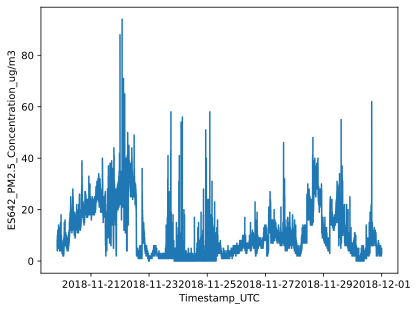

In [ ]:
trax_df_pm25 = trax_df[trax_df['ES642_PM2.5_Concentration_ug/m3'] != -9999.00]

trax_df_pm25.head(10)
# trax_df_pm25.shape

sns.lineplot(x=trax_df_pm25['Timestamp_UTC'], y=trax_df_pm25['ES642_PM2.5_Concentration_ug/m3'])

<Axes: xlabel='Timestamp_UTC', ylabel='2B_Ozone_Concentration_ppbv'>

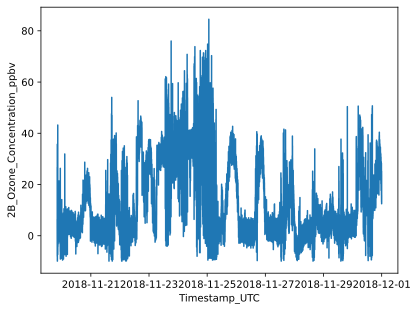

In [ ]:
trax_df_ozone = trax_df[trax_df['2B_Ozone_Concentration_ppbv'] != -9999.00]

trax_df_ozone.head(10)
# trax_df_ozone.shape

sns.lineplot(x=trax_df_ozone['Timestamp_UTC'], y=trax_df_ozone['2B_Ozone_Concentration_ppbv'])

<Axes: xlabel='Timestamp_UTC', ylabel='ES642_PM2.5_Concentration_ug/m3'>

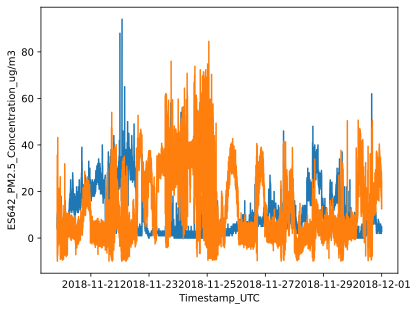

In [ ]:
trax_df_gmd = trax_df[(trax_df['ES642_PM2.5_Concentration_ug/m3'] != -9999.00) & (trax_df['2B_Ozone_Concentration_ppbv'] != -9999.00)]
# trax_df_gmd.shape

# sns.scatterplot(data=trax_df_gmd, x='Timestamp_UTC', y='ES642_PM2.5_Concentration_ug/m3')
# sns.scatterplot(data=trax_df_gmd, x='Timestamp_UTC', y='2B_Ozone_Concentration_ppbv')
sns.lineplot(x=trax_df_gmd['Timestamp_UTC'], y=trax_df_gmd['ES642_PM2.5_Concentration_ug/m3'])
sns.lineplot(x=trax_df_gmd['Timestamp_UTC'], y=trax_df_gmd['2B_Ozone_Concentration_ppbv'])
# plt.show()

In [ ]:
# sns.lineplot(x=trax_df_gmd['Latitude_ddeg'], y=trax_df_gmd['Longitude_ddeg'])